In [2]:
import pandas as pd
import geopandas as gpd
import rioxarray as rxr

In [ ]:
lst_orto = rxr.open_rasterio(r"../data/lst_orto_10m_max.tif")
df_orto = lst_orto.to_dataframe(name='value').reset_index()
df_orto = df_orto.dropna()

lst_s3 = rxr.open_rasterio(r"../data/ls3_s3_crop.tif")
df_s3 = lst_s3.to_dataframe(name='value').reset_index()
df_s3 = df_s3.dropna()

In [ ]:
df = pd.merge(df_orto, df_s3, on=['x', 'y'], suffixes=('_orto', '_s3'))
df = df[df["value_orto"] != -3.4e+38]
df = df[df["value_orto"] > 5]
df[["value_s3"]] = df[["value_s3"]].apply(lambda x: x - 273)
df2 = df[["x", "y", "value_orto", "value_s3"]]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df2["value_orto"].values.reshape(-1, 1)
y = df2["value_s3"].values

reg = LinearRegression().fit(X, y)

print(reg.coef_, reg.intercept_)
print(reg.score(X, y))

[0.01803514] 308.04642
0.0032308101654052734


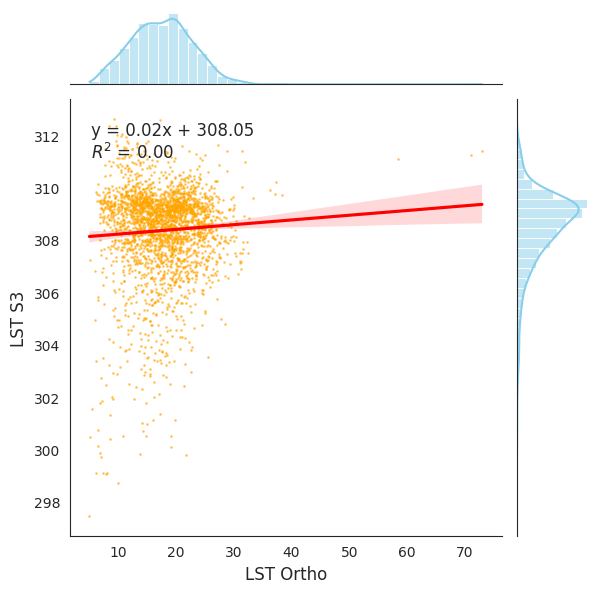

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('white'):
    g = sns.jointplot(x="value_orto", y="value_s3", data=df2, kind='reg', color='skyblue', 
                      joint_kws={'color':'orange'}, marginal_kws=dict(bins=40, fill=True),
                      scatter_kws={'s': 1, 'alpha': 0.5}, line_kws={'color': 'red'})
    g.set_axis_labels('LST Ortho', 'LST S3', fontsize=12)
    equation_text = f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}\n$R^2$ = {reg.score(X, y):.2f}'
    plt.text(0.05, 0.95, equation_text, transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top')